# "Neuron Firing Models: Hodgkin-Huxley Model"
> "aThis blog post outlines the basic biological and physical processes of neuron firing. Using this as a basis we look at a model of neuron firing in the form of the Hodgkin-Huxley model."
- toc: true
- author: Lewis Cole (2020)
- branch: master
- badges: false
- comments: false
- categories: [biology, computational-statistics, non-linear-dynamics, neuron]
- hide: false
- search_exclude: false

# Some (very basic) Biology
We start with a very limited description of what a neuron is and the mechanism by which it fires. For sake of completeness by neuron we will refer to pyramidal neurons, they make up a large proportion of neurons within the cortex of mammals. Other types of neurons are specialised for different functions. This background will be very brief and not cover the biology in any great detail. The literature and data on this topic is vast and I will not do it justice so any interested readers should look towards biology textbooks for more detailed descriptions.

The neuron is made up of 3 main components: a **soma** (cell body), an **axon** and many **dendrites**. In laymans terms the axon is the "output" of the neuron while the dendrites are "inputs" to the soma. The axon is covered in a **myelin sheath** which acts "insulation" which can "speed up" signal flow. Dendrites can futher be broken down into the apical dendrite, basal dendrites and dendritic spines. Both dendrites and axons are highly branched and a single neuron can be linked to many 1000s of others. Signals are passed through **synapses**. Synaptic inputs can be either **excitatory** (making the target neuron more likely to fire) or **inhibitory** (less likely).

![]({{ site.baseurl }}/images/neuron/neuron_anatomy.jpg)
(Source: https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg )

The details of axons and dendrites are not that important for our purposes right now. Instead we are interested in the soma: essentially where the signal is generated. The cell wall contains many voltage gated ion channels, most notably: sodium (**Na+**) and potassium (**K+**) channels. There are 2 forces acting on ions inside/outside of the soma: namely the electrical potential within the body and the concentration gradient. Resting membrane potential is around -40mv to -90mv, in this state there is a higher concentration of potassium ions inside the cell than outside and the reverse for sodium ions. The channel for potassium is highly permeable and so potassium ions flow into the soma, the sodium channel is semi-permeable so sodium slowly flow out of the soma, to maintain a constant negative potential the cell "pumps" ions in the reverse direction to maintain equilibrium.

An action potential (**neuron spike**) is a shift away from the negative equilibrium membrane potential to a positive potential. This is as a result of ion flows due to voltage controlled gates. There are 3 gates of interest here:
1. Sodium activation gate - normally closed but opens with positive potential
2. Sodium inactivation gate - normally open but closes with positive potential
3. Potassium inactivation gate - normally closed but opens with large positive potential

We can break down the events that cause the action potential then as:
1. **Depolarisation** - A depolarisation event occurs (e.g. a signal from the dendrites) which brings the cell's membrane potential to 0mv. This is as a result of positive charged ions flowing into the cell. As the potential increases to some threshold the sodium activation gate is opened which allows more positively charged sodium ions to enter. The potential then becomes positive.
2. **Repolarisation** - The positive potential causes the sodium inactivation gate to close preventing more sodium ions entering. Meanwhile the potassium inactivation gate opens, since the concentration of potassium ions inside the cell is much greater than outside this leads to an outflow of potassium. The removal of positively charged ions moves the cell back towards equilibrium.
3. **Refractory Period** - The potassium channel stays open slightly past the equilibrium point and the membrane potential becomes too negative (hyperpolarises). As the potassium channel closes the potential tends back to equilibrium. There is a short period after an action potential where the neuron is unable to fire again.

![]({{ site.baseurl }}/images/neuron/action-potential.png)
(Source: https://teachmephysiology.com/wp-content/uploads/2018/08/action-potential.png) 

In the rest of this blog we will look at models of action potentials and will try and keep this real world description of action potentials in mind.

## Hodgkin Huxley Model
We now consider a spiking neuron model as presented by Alan Hodgkin and Andrew Huxley in 1952, this model won them the Nobel prize for physiology in 1963. The model was developed by studying the axon of a giant squid neuron. The model itself tries to mimic the gates and ionic channels described above. Diagramatically we can represent the model as:
![]({{ site.baseurl }}/images/neuron/Hodgkin-Huxley.jpg)
(Source: https://vignette.wikia.nocookie.net/psychology/images/c/cf/Hodgkin-Huxley.jpg/revision/latest?cb=20061206001510)

The voltage controlled ionic gates conductances are represented in the diagram by gn (only one represented in the diagram) and there is a leak conductance represented by gl. Cm represents the membrane capacitance and there is an external stimulus Ip which represents inputs from other neurons (or a test current applied by a probe in experiment). We can then represent the model as a set of 4 interacting PDEs: <br/>
$ \frac{dV_m}{dt} = \frac{I_p}{C_m} - \frac{\overline{g_K}n^4}{C_m}(V_m-V_K) - \frac{\overline{g_{Na}}m^3h}{C_m}(V_m-V_{Na}) - \frac{\overline{g_L}}{C_m}(V_m-V_L) $ <br/>
$ \frac{dn}{dt} = \alpha_n(V_m)(1-n) - \beta_n(V_m)n $ <br/>
$ \frac{dm}{dt} = \alpha_m(V_m)(1-m) - \beta_m(V_m)m $ <br/>
$ \frac{dh}{dt} = \alpha_h(V_m)(1-h) - \beta_h(V_m)h $ <br/>

Where the functions $\alpha_x , \beta_x$ as suggested by Hodgkin and Huxley are: <br/>
$\alpha_n(V_m) = \frac{0.01(10-V_m)}{e^{(1.0-0.1V_m)}-1} $ <br/>
$\beta_n(V_m) = 0.125 e^{-V_m / 80} $ <br/>
$\alpha_m(V_m) = \frac{0.1(25-V_m)}{e^{(2.5-0.1V_m)}-1} $ <br/>
$\beta_m(V_m) = 4 e^{-V_m / 18} $ <br/>
$\alpha_h(V_m) =  0.07 e^{-V_m / 20} $ <br/>
$\beta_h(V_m) = \frac{1}{e^{(3.0-0.1V_m)}+1} $ <br/>

The following values are suggested for the model constants: <br/>
$C_m = 1 \mu F /cm^2$ - Capacitance per unit surface area of neuron membrane <br/>
$ \overline{g_{Na}} = 120 \mu S / cm^2$ - Voltage controlled  sodium conductance per unit surface area <br/>
$ \overline{g_{K}} = 36 \mu S / cm^2$ - Voltage controlled  potassium conductance per unit surface area <br/>
$ \overline{g_{L}} = 0.336 \mu S / cm^2$ - Voltage controlled  leak conductance per unit surface area <br/>
$V_{Na} = 115mV$ - Sodium voltage gradient <br/>
$V_{K} = -12mV$ - Potassium voltage gradient <br/>
$V_{L} = 10.613mV$ - Leak current voltage gradient <br/>

This is a non-linear system of differential equations and as such it is not possible to study analytically. However we can simulate this numerically. For this example we will assume that the external stimulus follows a white noise (Brownian motion). Under certain conditions this can be a reasonable assumption. We will define this as follows:
$I_p(t) = \sigma W_t$ for some positive constant $\sigma$ with units $\mu A / cm^2$

By introducing stochastic noise such as this we unfortunately are unable to use any of the Python pre-made ODE integrators (e.g. scipy.integrate.ode) instead we will rely on a forward Euler scheme which will perform well enough for our purposes assuming the discrete time steps are selected to be sufficiently small. An example implementation of this can be seen below:

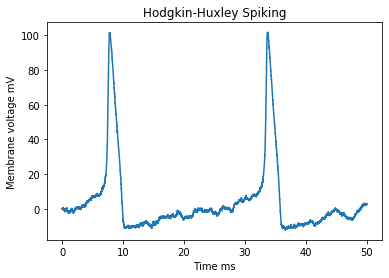

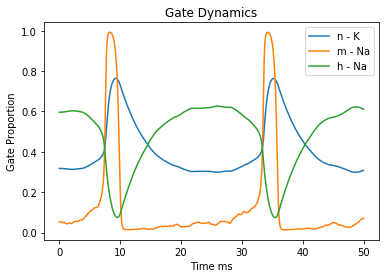

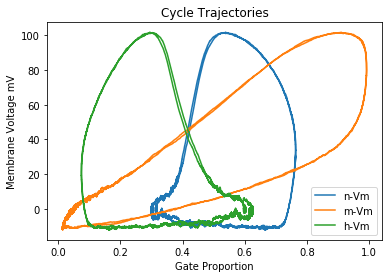

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set seed
np.random.seed(123)

# Set time step dt (ms) and number of steps for simulation N
dt = 0.001
N = 50000

# Set up time array T
T = np.arange(N) * dt

# Set model inputs, using nomenclature: K - Potassium, Na - Sodium, L - Leak
# Set membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Set applied current density volatility (uA/cm^2)
sigma = 2

# Set channel conductance per unit area (mS/cm^2)
gK = 36.0
gNa = 120.0
gL = 0.3

# Set voltage gradients (mV)
VK = -12.0
VNa = 115.0
VL = 10.613

# Define ion channel rate functions
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)
def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)
def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)
def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)

# Define applied signal function - can be replaced to investigate different signals
def Ip(sig, t, V):
    return np.sqrt(dt) * sig * np.random.normal(0, 1, 1)

# Set up arrays for dynamic results
Vm =  np.zeros(N)
n = np.zeros(N)
m = np.zeros(N)
h = np.zeros(N)
Signal = np.zeros(N)

# Initialize the system
V0 = 0
Vm[0] = V0
n[0] = alpha_n(V0) / (alpha_n(V0) + beta_n(V0))
m[0] = alpha_m(V0) / (alpha_m(V0) + beta_m(V0))
h[0] = alpha_h(V0) / (alpha_h(V0) + beta_h(V0))

# Loop through Euler-Forward scheme
for i in range(1, N):
    Signal[i] = Ip(sigma, i*dt, Vm[i-1])/Cm
    Vm[i] = Vm[i-1] + Signal[i] - gK*np.power(n[i-1],4)*(Vm[i-1]-VK)*dt/Cm - gNa*np.power(m[i-1],3)*h[i-1]*(Vm[i-1]-VNa)*dt/Cm - gL*(Vm[i-1]-VL)*dt/Cm
    n[i] = n[i-1] + (alpha_n(Vm[i-1])*(1 - n[i-1]) - beta_n(Vm[i-1])*n[i-1])*dt
    m[i] = m[i-1] + (alpha_m(Vm[i-1])*(1 - m[i-1]) - beta_m(Vm[i-1])*m[i-1])*dt
    h[i] = h[i-1] + (alpha_h(Vm[i-1])*(1 - h[i-1]) - beta_h(Vm[i-1])*h[i-1])*dt

# Plot sample path
plt.plot(T, Vm)
plt.xlabel("Time ms")
plt.ylabel("Membrane voltage mV")
plt.title("Hodgkin-Huxley Spiking")
plt.show()

# Plot gate opening over time
plt.plot(T, n, label="n - K")
plt.plot(T, m, label="m - Na")
plt.plot(T, h, label="h - Na")
plt.legend(loc="upper right")
plt.xlabel("Time ms")
plt.ylabel("Gate Proportion")
plt.title("Gate Dynamics")
plt.show()

# Plot Limit trajectories
plt.plot(n, Vm, label="n-Vm")
plt.plot(m, Vm, label="m-Vm")
plt.plot(h,Vm, label="h-Vm")
plt.legend()
plt.title("Cycle Trajectories")
plt.xlabel("Gate Proportion")
plt.ylabel("Membrane Voltage mV")
plt.show()